## Supervised Learning (Regression)

> **Supervised learning** is a type of Machine Learning invlolving learning a function that maps inputs to outputs based on provided  input-output pairs. Learning == Model Training.

<img src = "https://www.researchgate.net/publication/324426321/figure/fig4/AS:614073280507906@1523417887240/Typical-Flow-chart-of-a-supervised-learning-classification-algorithm.png" width="400">

> **Regression** - a type of supervised learning used to predict continuous (dependent) variable given a set of independent variables. 

> *Mathematical expression*: **Y = βo + β1X + ∈** where; 
>   * ...
    * Y - Dependent variable(Target, Predicted) - the variable we predict.
    * X - Independent variable(predictor) - the variable we use to make a prediction.
    * βo - This is the intercept term. It is the prediction value you get when X = 0
    * β1 - This is the slope term. It explains the change in Y when X changes by 1 unit.
    * ∈ - This represents the residual value, i.e. the difference between actual and predicted values.(error term).
    
>                       β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)² where i= 1 to n (no. of obs.)

                        βo = ymean - β1(xmean)  
> expression for multiple regression (when we have more than one predictor variables - typical case): **y = βo + β1x1 + β2x2 + … + βnxn + c.**
>   * ...
    * βn - This is the slope term. It explains the change in Y when Xn changes by 1 unit.
 
    
> **Error term minimisation - Ordinary Least Squares(OLS)** - OLS technique tries to reduce the sum of squared errors ∑[Actual(y) - Predicted(y')]² by finding the best possible value of regression coefficients (β0, β1, etc).
> Why OLS:
1. It uses squared error which has nice mathematical properties, thereby making it easier to differentiate and compute gradient descent.
2. OLS is easy to analyze and computationally faster, i.e. it can be quickly applied to data sets having 1000s of features.
3. Interpretation of OLS is much easier than other regression techniques.

> **Assumptions**:
* ...
* There exists a **linear** and **additive** relationship between dependent and independent variables. By linear, it means that the change in DV by 1 unit change in IV is constant. By additive, it refers to the effect of X on Y is independent of other variables.
* There must be **no correlation** among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.
* The error terms must possess constant variance. Absence of constant variance leads to **heteroskedestacity**. (Heteroskedastic refers to a condition in which the variance of the residual term, or error term, in a regression model varies widely. 
* The error terms must be uncorrelated i.e. error at **∈t** must not indicate the error at **∈t+1**. Presence of correlation in error terms is known as **Autocorrelation**. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.
* The dependent variable and the error terms must possess a **normal distribution**.

> **Examples of regression problems**:
* Prediction of house prices.
* Prediction of loan eligibility amount.
* Salary prediction.

#### SLR Model

In [2]:
import pandas as pd

data = pd.read_csv('/content/trains.csv')
print(data.shape)
data.head(5)

In [3]:
data.info()

NameError: ignored

In [ ]:
data.isna().sum()

In [ ]:
# changing date dtype
data['Date'] = pd.to_datetime(data.Date)

# extracting variables from date column
data['Month'] = data['Date'].dt.month.to_list()
data['Year'] = data['Date'].dt.year.to_list()
data['Day'] = data['Date'].dt.day.to_list()
data['WeekOfYear'] = data['Date'].dt.weekofyear.to_list()
data['DayOfWeek'] = data['Date'].dt.dayofweek.to_list()

# weekday or not weekday
data['weekday'] = 1        # Initialize the column with default value of 1
data.loc[data['DayOfWeek'] == 5, 'weekday'] = 0
data.loc[data['DayOfWeek'] == 6, 'weekday'] = 0

# selection
data = data.drop(['Store', 'Date'], axis = 1)
data.shape

# encoding categorical columns
data = pd.get_dummies(data)

# scaling/normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns = data.columns)

In [ ]:
data.head()

In [ ]:
# seperating data set into dependent and independent variables
x = data.drop(['Sales'], axis = 1)
y = data[['Sales']]

##splitting data set to train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# straight-forward modeling
from sklearn.linear_model import LinearRegression

# creating our model
regressor = LinearRegression()

# model training/fitting
regressor = regressor.fit(x_train, y_train)

# running predictions
y_pred = regressor.predict(x_test)
print(y_pred.shape)
y_pred[:5]

In [ ]:
# evaluation

#### Cross Validation
> Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 

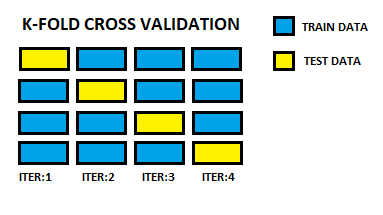

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
# use of cross validation (kfolds)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LinearRegression()
# create a KFold object with 7 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 0)
scores = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores   

array([0.25390416, 0.25606603, 0.25518321, 0.25493593])

#### Decision Trees Regressors

> Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A **decision node** has two or more branches. **Leaf node** represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called **root node**. Decision trees can handle both categorical and numerical data. For regression-type problems, the final prediction is usually the average of all of the values contained in the leaf it falls under.

<img src = "https://miro.medium.com/max/410/1*JAEY3KP7TU2Q6HN6LasMrw.png">

> **Entropy** - A measure of the uncertainty associated with a random variable.
> **Ei = ΣPi log2 Pi** where Pi is the probability of randomly picking an element of class i (Measure of impurity).

> **Information Gain** - The amount of information gained about a random variable from observing another random variable.  **IG(Y|X) = E(Y) - E(Y|X)**. In other words, IG tells us how many more bits do I need to measure Y, when the information about X is already known. So, in a sense you reduce uncertainty with the additional information available from one random variable. (Measure of purity)
<img src = 'https://miro.medium.com/max/700/1*5Bzoc6n44YXGAZtmEWCi9Q.png'>

> Steps for constructing a decision tree:
1. Calculate **entropy** of the target variable.
2. Calculate the **information gain (IG)** by subtracting entropy before the split from the total entropy for the split after spliting the dataeset on different attributes/featuers. 
3. Choose the attribute with the largest IG as decision node, divide the dataset by its branches and repeat the same process on every branch.
4. A branch with 0 entropy is a leaf node. A branch with entropy > 0 needs further split.
5. The algorithm is run recursively on non-leaf branches until all decisions have been made. 

> Assumptions:
* In the beginning, the whole training set is considered as the root.
* Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach. 

> parameters:
* criterion - “mse”, “friedman_mse”, “mae”; default=”mse” (measure to measure quality of split).
* splitter - “best”, “random”, default=”best”; (strategy used to choose split at each node).
* max_depth - default = NOne; how deep should the tree be splitted.
* min_samples_split - The minimum number of samples required to split an internal node.

> <img src = 'https://miro.medium.com/max/1414/1*nMDP48LmXR0J9R434tSH0A.png' width = "500">

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
# create a KFold object with 7 splits 
folds = KFold(n_splits = 7, shuffle = True, random_state = 42)
scores = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores  

array([0.30370412, 0.30366601, 0.30426114, 0.30301089, 0.30517469,
       0.30510977, 0.30369339])

In [ ]:
import numpy as np
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.expm1(y_pred)
y_pred[:5]

array([ 1.06311527, -0.77680794,  2.67910694, -0.77680794,  2.08263098])

### Bayesian Regressors

> **Frequentist** approach to regression modeling (one who defines the probability of an event (such as heads in flipping a coin) as the limiting value of its frequency in a large number of trials):

<img src = 'https://miro.medium.com/max/445/1*UmoUi8s8awQIEoZeuOQ0rQ.png'>

> **Bayesian** approach: someone who tries to determine the probability that a theory is true given the observed data.

> **Bayes Theorem**: A mathematical formula for determining conditional probability. **Conditional probability** is the likelihood of an outcome occurring, based on a previous outcome occurring. 

> Formula:
**P(A∣B) = P(A⋂B)/P(B) = P(A)⋅P(B∣A)/P(B)**

> where:
* P(A)= The probability of A occurring.
* P(B)= The probability of B occurring (Normalizer).
* P(A∣B)=The probability of A given B (Likelihood).
* P(B∣A)= The probability of B given A.
* P(A⋂B))= The probability of both A and B occurring.

> **Bayesian approach/inferencing to regression**: "In the Bayesian viewpoint, we formulate linear regression using probability distributions rather than point estimates. The response, **y**, is not estimated as a single value, but is assumed to be drawn from a probability distribution. The model for Bayesian Linear Regression with the response sampled from a normal distribution is:"

> <img src = 'https://miro.medium.com/max/408/1*JNlUDqc9NWqkT3t9HrGQiw.png' width="250">

>The output:
* **B** - Weight matrix.
* **X** - predictor matrix.
* **I** - Identity matrix.
* **y** is generated from a normal (Gaussian) Distribution characterized by a mean and variance.
* The **mean** for linear regression is the transpose of the weight matrix multiplied by the predictor matrix.
* The **variance** is the square of the standard deviation σ (multiplied by the Identity matrix because this is a multi-dimensional formulation of the model).

> The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters (weights), but rather to determine the posterior distribution for the model parameters. Not only is the response generated from a probability distribution, but the model parameters are assumed to come from a distribution as well. The posterior probability of the model parameters is conditional upon the training inputs and outputs:

> <img src = 'https://miro.medium.com/max/377/1*JnXTBQdzzfCaFc1PXVZUQQ.png' width="200">

> Here, 
* P(β|y, X) is the posterior probability distribution of the model parameters given the inputs and outputs. 
* P(y|β, X), multiplied by the prior probability of the parameters (P(β|X) - This is equal to the likelihood of the data) and divided by a normalization constant(P(y|X)) ~ Bayes Theorem.

> In contrast to OLS, we have a posterior distribution for the model parameters that is proportional to the likelihood of the data multiplied by the prior probability of the parameters. Here we can observe the two primary benefits of Bayesian Linear Regression.
* **Priors** - We have domain knowledge for what the model parameters should look like.
* **Posterior** - The result of performing Bayesian Linear Regression is a distribution of possible model parameters based on the data and the prior thus it allows us to quantify uncertainity of our model.

#### [Implementation:](https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e)
> Evaluating the posterior distribution for the model parameters is unmanagaable for continuous variables, so we use sampling methods to draw samples from the posterior in order to approximate the posterior. [Monte Carlos methods](https://towardsdatascience.com/markov-chain-monte-carlo-in-python-44f7e609be98) can be applied here. According to wikipedia, **Monte Carlo methods**, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.

In [ ]:
x_train.head()

,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,Year,Day,WeekOfYear,weekday,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
403181,1.502791,-1.363330,-2.210440,-0.785400,-0.466372,0.346724,0.215730,-1.104141,0.234490,-1.585611,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
235532,0.000831,-1.363330,-2.210440,-0.785400,2.144211,-1.457193,1.502077,-1.673123,-1.566890,0.630672,-0.384596,-2.296594,7.014824,-0.081366,-0.063616
109696,0.501484,0.025525,0.452399,-0.785400,-0.466372,-0.555234,1.502077,0.944192,-0.458348,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
179596,0.501484,0.488476,0.452399,1.273237,-0.466372,-1.156540,1.502077,0.489007,-1.081903,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
381533,-1.000476,0.367894,0.452399,1.273237,2.144211,0.346724,0.215730,1.513173,0.511626,0.630672,2.600132,-2.296594,-0.142555,-0.081366,-0.063616


In [1]:
import pymc3 as pm
from pymc3 import traceplot

# Formula for Bayesian Linear Regression 
formula = 'Sales ~ ' + ' + '.join(['%s' % variable for variable in x_train.columns])

print(formula)

In [ ]:
# Context for the model
with pm.Model() as normal_model:
        
    # The prior for the model parameters will be a normal/gaussian distribution.
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family - to indicate the distribution)
    pm.GLM.from_formula(formula, data = x_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sd, StateHoliday_c, StateHoliday_b, StateHoliday_a, StateHoliday_0[1], StateHoliday_0[0], weekday, WeekOfYear, Day, Year, Month, SchoolHoliday, Promo, Open, Customers, DayOfWeek, Intercept]
 51%|█████     | 1271/2500 [2:25:08<4:36:40, 13.51s/it]

In [ ]:
# posterior plots
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);

In [ ]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, np.mean(normal_trace[variable])))

* negatively related to the target variable if weight is negative and vice versa.

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(prediction, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

median_pred = x_train['UWC'].median()
median_preds = [median_pred for _ in range(len(x_test))]
true = x_test['UWC']

# Display mae and rmse
mae, rmse = evaluate_prediction(median_preds, true)
print('Mean Absolute Error: ',mae)
print('Root Mean Square Error:', rmse)

### Model Evaluation (Loss Functions)

> 1. **Mean Square Error, Quadratic loss, L2 Loss** - MSE is the sum of squared distances between our target variable and predicted values. 

<img src = 'https://miro.medium.com/max/255/1*mlXnpXGdhMefPybSQtRmDA.png' width = '200'>

> 2. **Mean Absolute Error, L1 Loss** - sum of absolute differences between our target and predicted variables.

<img src = 'https://miro.medium.com/max/257/1*xjarhfIDtRcaNhp7ZEyEdg.png' width = '200'>

> PS: using the squared error is easier to solve, but using the absolute error is more robust to outliers.

> 3. **Huber Loss, Smooth Mean Absolute Error** - less sensitive to outliers in data than the squared error loss. It’s also differentiable at 0. It’s basically absolute error, which becomes quadratic when error is small. How small that error has to be to make it quadratic depends on a hyperparameter, 𝛿 (delta), which can be tuned. Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞ (large numbers.)

> 4. **Log-Cosh Loss** - smoother than L2. Log-cosh is the logarithm of the hyperbolic cosine of the prediction error. 

<img src = 'https://miro.medium.com/max/436/1*hj5n5273jYX7rclO7bnfJg.png' width = '200'>

> 5. **Quantile Loss** - useful when we are interested in predicting an interval instead of only point predictions. 


In [ ]:
# mse
def mse(true, pred): 
    return np.sum((true - pred)**2)

# mae
def mae(true, pred):
    return np.sum(np.abs(true - pred))
 
# also available in sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# huber loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

# log cosh loss
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)